In [18]:
#Importing libraries
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow
import warnings
warnings.filterwarnings('ignore')

In [19]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/. kaggle/

cp: target 'kaggle/' is not a directory


In [20]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [21]:
import zipfile
zip_ref = zipfile.ZipFile("/content/dogs-vs-cats.zip","r")
zip_ref.extractall("/content")
zip_ref.close()

In [23]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [24]:
train_dataset = keras.utils.image_dataset_from_directory(
    directory="/content/train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256))
test_dataset = keras.utils.image_dataset_from_directory(
    directory="/content/test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256))

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [25]:
def process(image,label):
  image = tensorflow.cast(image/255, tensorflow.float32)
  return image,label

train_ds = train_dataset.map(process)
validation_ds = test_dataset.map(process)

In [31]:
model = Sequential()

#Convolutional Layer
model.add(Conv2D(32,kernel_size=(5,5),strides=(2,2),padding="same",activation="relu",input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding="same",strides=2))

model.add(Conv2D(64,kernel_size=(4,4),strides=(2,2),padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding="same",strides=2))

model.add(Conv2D(128,kernel_size=(4,4),strides=(2,2),padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding="same",strides=2))

model.add(Conv2D(256,kernel_size=(3,3),strides=(2,2),padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding="same",strides=2))

model.add(Flatten())

#Fully connected Layer

model.add(Dense(256,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid"))

In [34]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
a = model.fit(train_ds,validation_data=validation_ds,epochs=13)


Epoch 1/13
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 66ms/step - accuracy: 0.9332 - loss: 0.1916 - val_accuracy: 0.7856 - val_loss: 0.6410
Epoch 2/13
625/625 ━━━━━━━━━━━━━━━━━━━━ 76s 66ms/step - accuracy: 0.9430 - loss: 0.1588 - val_accuracy: 0.8372 - val_loss: 0.5029
Epoch 3/13
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 61ms/step - accuracy: 0.9572 - loss: 0.1255 - val_accuracy: 0.8042 - val_loss: 0.5346
Epoch 4/13
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 66ms/step - accuracy: 0.9587 - loss: 0.1245 - val_accuracy: 0.8492 - val_loss: 0.6098
Epoch 5/13
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 66ms/step - accuracy: 0.9654 - loss: 0.1100 - val_accuracy: 0.8284 - val_loss: 0.6681
Epoch 6/13
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.9684 - loss: 0.0989 - val_accuracy: 0.8366 - val_loss: 0.6713
Epoch 7/13
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 61ms/step - accuracy: 0.9725 - loss: 0.0774 - val_accuracy: 0.8510 - val_loss: 0.6954
Epoch 8/13
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.9769 - loss: 0.0770 - 

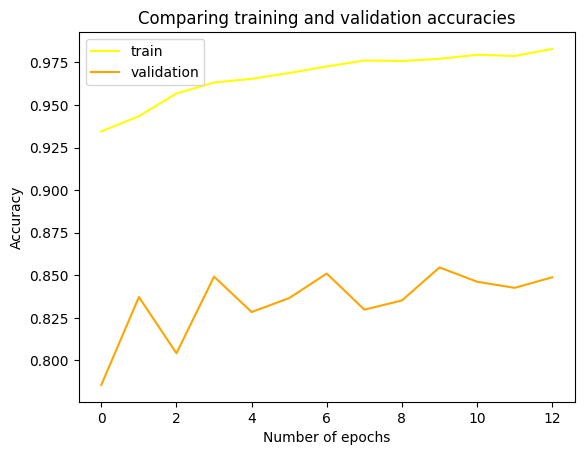

In [35]:
#Plotting accuracy graph
plt.plot(a.history["accuracy"],color="yellow",label="train")
plt.plot(a.history["val_accuracy"],color="orange",label="validation")
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.title("Comparing training and validation accuracies")
plt.legend()
plt.show()

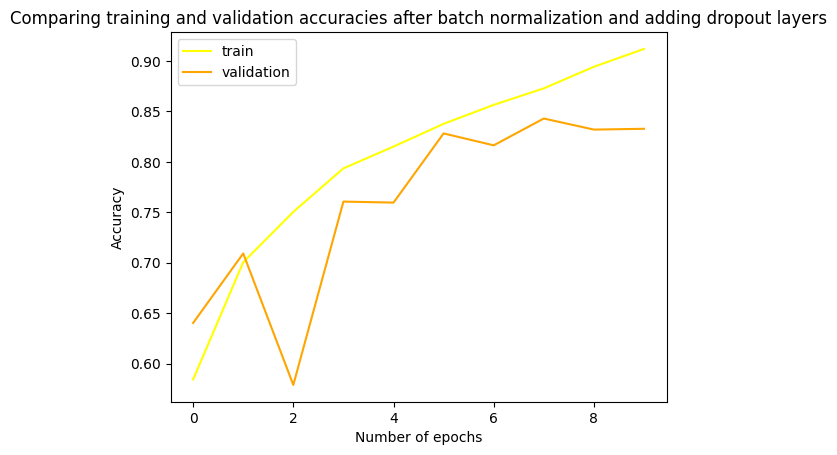

In [30]:
#Plotting accuracy graph after batch normalization and dropout
plt.plot(a.history["accuracy"],color="yellow",label="train")
plt.plot(a.history["val_accuracy"],color="orange",label="validation")
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.title("Comparing training and validation accuracies after batch normalization and adding dropout layers")
plt.legend()
plt.show()